Select(description='Select:', layout=Layout(height='200px', width='600px'), options=(('gpt-3.5-turbo', 'Ternar…

Button(description='Extract Values', style=ButtonStyle())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5


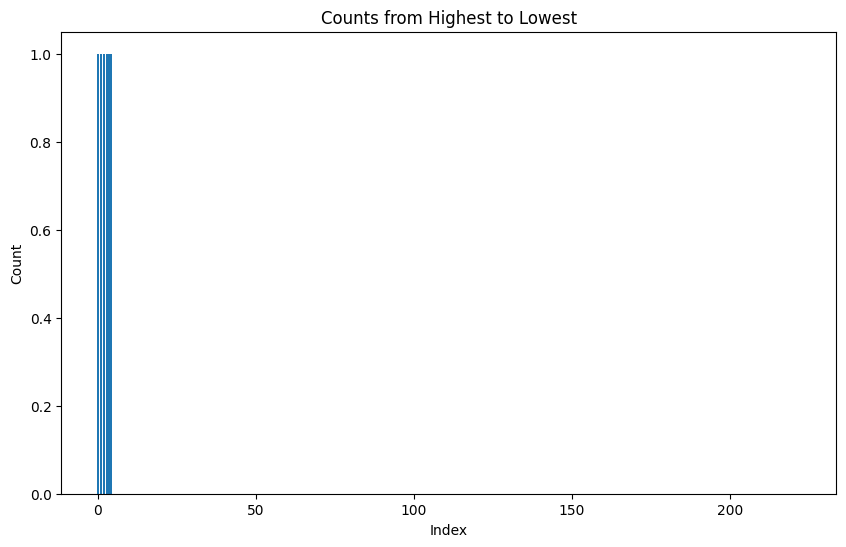

In [ ]:
import pandas as pd
import numpy as np
import csv
import glob
import matplotlib.pyplot as plt
from matplotlib import gridspec
import math
from matplotlib import patches
from matplotlib.ticker import FuncFormatter
import math
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import re
import os
import re
import pandas as pd
import numpy as np
from IPython.display import display
import ipywidgets as widgets
from ipywidgets import Layout, Button
import collections

import re

def extract_info(filename):
    pattern = r"(?P<model>.*?)_(?P<prompt>Context|NoContext|ZeroContext|TernaryAlloy|TernaryAlloycontext)_prompt_experiment_(?P<experiment>\d+)_temp_(?P<temp>[\d.]+)_target_(?P<target>[\d.]+)_.*?_Dev_Budget_(?P<budget>\d+)_recursive_(?P<recursive>\d+)_.*?\.csv"
    match = re.match(pattern, filename)
    if match:
        # Return a tuple as explicitly stated
        return (match.group('model'), match.group('prompt'), match.group('temp'), match.group('target'), int(match.group('budget')), int(match.group('recursive')))
    return None


def unique_combinations(directory):
    unique_sets = set()
    for filename in os.listdir(directory):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath):
            info = extract_info(filename)
            if info:
                unique_sets.add(info)  # This should work fine if info is a tuple

    # Convert the set to a list for sorting or further operations
    unique_list = list(unique_sets)
    unique_list.sort(key=lambda x: (x[2], x[0]))  # Example sorting logic

    return unique_list
directories = [r'C:\Users\domin\Desktop\ETH\Capstone Project\LLM-s-can-Design-Sustainable-Concrete-a-Systematic-Benchmark-Code-\Results\LLM']  # Use raw string for Windows paths

# Generate unique combinations
unique_combos = unique_combinations(directories[0])

# Create a select widget
select = widgets.Select(
    options=unique_combos,
    description='Select:',
    disabled=False,
)

select.layout = Layout(width='600px', height='200px')
# Display the select widget
display(select)
# Define the button
extract_button = Button(description="Plot")

# Define the function to extract values from the selected files
def extract_values(button):
    selected_files = select.value
    extracted_data = []
    nexperiments = 0

    for directory in directories:
        for filename in os.listdir(directory):
            filepath = os.path.join(directory, filename)
            if os.path.isfile(filepath):
                info = extract_info(filename)
                if info and info == selected_files:
                    nexperiments += 1
                    file_df = pd.read_csv(filepath)
                    for _, row in file_df.iterrows():
                        combination = row['Combination']
                        elements = re.findall(r'=\s*([A-Za-z]+)', combination)
                        if len(elements) == 3:
                            extracted_data.append(elements)

    # Convert the extracted data to a DataFrame
    extracted_df = pd.DataFrame(extracted_data, columns=['M', 'A', 'X'])
    file_path = r'C:\Users\domin\Desktop\ETH\Capstone Project\LLM-s-can-Design-Sustainable-Concrete-a-Systematic-Benchmark-Code-\Data\alloys.csv'
    formulation_df = create_formulation_df(file_path)
    counts = count_occurrences(formulation_df, extracted_df)
    print('Number of experiments:', nexperiments)
    print(np.sum(counts))
    plot_counts(counts)

import csv
import re

def create_formulation_df(file_path):
    df = pd.read_csv(file_path)
    # Initialize empty DataFrame with adjusted column titles
    formulation_df = pd.DataFrame(columns=['M', 'A', 'X'])

    # Loop through each row in the original data
    for idx, row in df.iterrows():
        # Get necessary attributes from row
        M = row["M-site element"]
        A = row["A-site element"]
        X = row["X-site element"]

        # Create formulation string in the same format as the model's output
        formulation = M, A, X

        # Append the formulation and its respective strength to the new DataFrame
        new_row = pd.DataFrame([formulation], columns=['M', 'A', 'X'])
        formulation_df = pd.concat([formulation_df, new_row], ignore_index=True)

    return formulation_df

def count_occurrences(formulation_df, extracted_df):
    counts = []
    for _, row in formulation_df.iterrows():
        count = ((extracted_df['M'] == row['M']) & 
                (extracted_df['A'] == row['A']) & 
                (extracted_df['X'] == row['X'])).sum()
        counts.append(int(count))
    return counts

def plot_counts(counts):
    sorted_counts = sorted(counts, reverse=True)
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(sorted_counts)), sorted_counts)
    plt.xlabel('Index')
    plt.ylabel('Count')
    plt.title('Counts from Highest to Lowest')
    plt.show()

    # Example usage




# Attach the function to the button
extract_button.on_click(extract_values)

display(extract_button)




